# Decision Trees

## In this notebook we build decision tree models using the PISA 2022 UK data

### First a basic decision tree using default hyperparameters, then exploring regularization

### N.B.: Using sample weights for proper survey data handling

In [1]:
#Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [3]:
#Load and split data 

In [22]:
train_df = pd.read_csv("/workspaces/mini_project_2/data/processed/train.csv")
val_df   = pd.read_csv("/workspaces/mini_project_2/data/processed/val.csv")
test_df  = pd.read_csv("/workspaces/mini_project_2/data/processed/test.csv")

In [23]:
X_train = train_df.drop(columns=["target", "sample_weight"])
y_train = train_df["target"]
w_train = train_df["sample_weight"]

X_val = val_df.drop(columns=["target", "sample_weight"])
y_val = val_df["target"]
w_val = val_df["sample_weight"]

X_test = test_df.drop(columns=["target", "sample_weight"])
y_test = test_df["target"]
w_test = test_df["sample_weight"]

# Train a Basic Decision Tree 

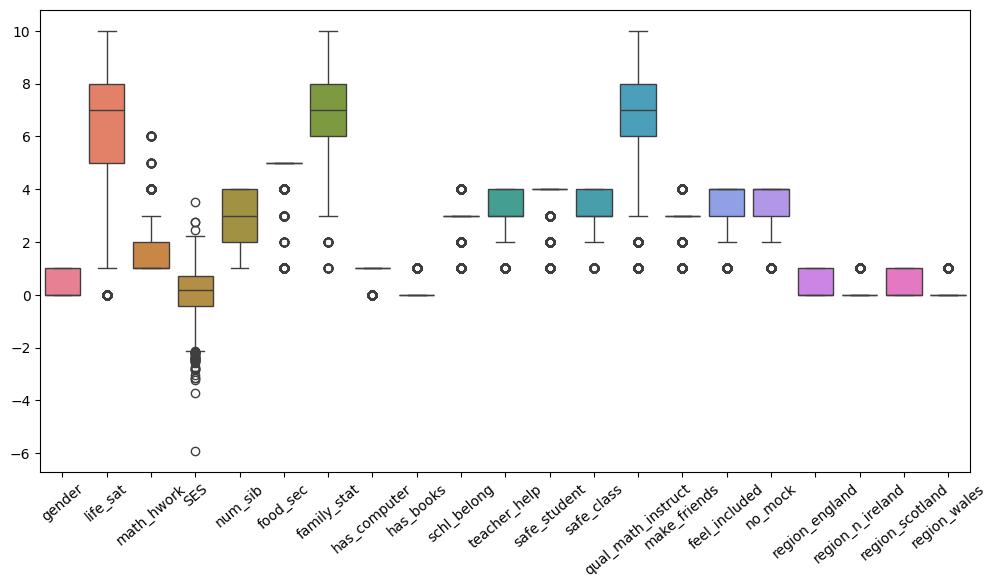

In [24]:
# Visualise the features 
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=40)
plt.show()

##### The boxplot reveals that most features have reasonable spread, with notable outliers in socioeconomic and homework variables. Binary variables (like gender, computer access, books, and regional dummies) show expected distributions. This distribution check validates our data preprocessing and helps confirm suitability for tree-based models, which are robust to non-normal distributions and outliers.

In [ ]:
Precision - of all the students the model predicted to be at-risk only 59% were actually at risk
Recall - of all the students who were actually at-risk, the model correctly identified 58% 
f1 score - overall quality of the modle in identifying students at risk is 59% 

Overall the model is moderately good at finding students at-risk - it correctly identifies 58% of all truly at-risk students, while of the students it identiies at risk 41% are not actually at risk which means that if the results are used for interventions then some students who do not need extra help may receive it

In education, recaall for students at risk is often prioritised to catch as many at-risk students as possible
Next steps - tuning the model adjusting for depth 

In [25]:
# Train a Basic Decision Tree (without weights first for comparison)
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Predictions without weights
y_train_pred_basic = dt_basic.predict(X_train)
y_val_pred_basic = dt_basic.predict(X_val)

In [27]:
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_basic):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_basic):.4f}")

Training Accuracy: 0.9528
Validation Accuracy: 0.5969


In [28]:
# Train Decision Tree WITH sample weights
print("\n🌳 Training Decision Tree WITH Sample Weights...")
dt_weighted = DecisionTreeClassifier(random_state=42)
dt_weighted.fit(X_train, y_train, sample_weight=w_train)


🌳 Training Decision Tree WITH Sample Weights...


DecisionTreeClassifier(random_state=42)

In [29]:
# Predictions with weights
y_train_pred_weighted = dt_weighted.predict(X_train)
y_val_pred_weighted = dt_weighted.predict(X_val)


In [30]:
print("📊 Weighted Decision Tree Results:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_weighted):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_weighted):.4f}")

📊 Weighted Decision Tree Results:
Training Accuracy: 0.9522
Validation Accuracy: 0.6000
